# Predicting the popularity of the future k-pop idol:

### 1.Data Analysis
### 2.Data Preprocessing
### 3.Feature Engineering
### 4.Conclusion

In [11]:
#import libraries
import pandas as pd
import numpy as np 
#read dataset
data = pd.read_csv("kpopdataset.csv",sep="\t",delimiter = ";")
test = pd.read_csv("testdata.csv",sep="\t",delimiter = ";")

# 1. Data Analysis

In [12]:
data.head()


,rank,name,agency,real name,group,age,height,weight,blood type,origin,country,position,industry,gender,curr date,birth date
0,1,Jinah,주식회사 씨그널엔터테인먼트그룹,Seo Jin Ah,Berry Chu,37.0,NaN,NaN,NaN,Seoul,South Korea,"Leader, Vocalist",K-pop,Female,23.04.2020,29.04.1983
1,2,Hayul,주식회사 씨그널엔터테인먼트그룹,Kim Ha Yul,Berry Chu,33.0,NaN,NaN,NaN,Seoul,South Korea,Vocalist,K-pop,Female,23.04.2020,18.10.1986
2,3,Jieun,주식회사 씨그널엔터테인먼트그룹,Han Ji Eun,Berry Chu,33.0,NaN,NaN,NaN,Seoul,South Korea,Vocalist,K-pop,Female,23.04.2020,12.01.1987
3,4,Yunmi,주식회사 씨그널엔터테인먼트그룹,Heo Yun Mi,Berry Chu,32.0,NaN,NaN,NaN,Incheon,South Korea,Vocalist,K-pop,Female,23.04.2020,23.03.1988
4,5,Haum,주식회사 씨그널엔터테인먼트그룹,Kim Haum,Berry Chu,29.0,NaN,NaN,NaN,Seoul,South Korea,"Vocalist, Maknae",K-pop,Female,23.04.2020,20.10.1990


In [13]:
test.head()

,rank,name,agency,real name,group,age,height,weight,blood type,origin,country,position,industry,gender
0,1,Peak,Chandelier Music,Kongthap Peak,NaN,19,186,71,A,Thai,Thailand,NaN,K-pop,Male
1,2,Son Dong Pyo,DSP Media,Son Dong Pyo,NaN,22,166,48,O,Korean,South Korea,"Vocalist, dancer",K-pop,Male
2,3,Lee Jun Hyuk,DSP Media,Lee Jun Hyuk,NaN,19,180,63,B,Korean,South Korea,"Rapper, Vocalist, Dancer",K-pop,Male
3,4,Lee Hwan,DSP Media,Lee Hwan,NaN,21,169,53,A,Korean,South Korea,Vocalist,K-pop,Male
4,5,Yoon Seo Hyeung,&August,Yoon Seo Hyeung,NaN,21,163,44,B,Korean,South Korea,Musical,K-pop,Female


In [14]:
data.shape

(1901, 16)

In [15]:
test.shape

(100, 14)

In [16]:
#missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 16 columns):
rank          1901 non-null int64
name          1901 non-null object
agency        1874 non-null object
real name     1566 non-null object
group         1901 non-null object
age           1725 non-null float64
height        1603 non-null float64
weight        1253 non-null float64
blood type    1349 non-null object
origin        686 non-null object
country       1895 non-null object
position      1836 non-null object
industry      1901 non-null object
gender        1901 non-null object
curr date     1901 non-null object
birth date    1725 non-null object
dtypes: float64(3), int64(1), object(12)
memory usage: 237.7+ KB


In [17]:
#determine the amount of missing values
data.isnull().sum()

rank             0
name             0
agency          27
real name      335
group            0
age            176
height         298
weight         648
blood type     552
origin        1215
country          6
position        65
industry         0
gender           0
curr date        0
birth date     176
dtype: int64

In [18]:
test.isnull().sum()

rank            0
name            0
agency          0
real name       1
group         100
age             0
height          0
weight          0
blood type      0
origin          0
country         0
position       19
industry        0
gender          0
dtype: int64

In [19]:
#drop unnecessary columns
to_drop = ['real name', 'origin', 'industry', 'curr date', 'birth date']
data = data.drop(to_drop, axis=1)


In [20]:
#read new dataset of popular groups
popular = pd.read_csv("bestkpopgroups.csv",sep="\t",delimiter = ";")
popular.head()

,Rank,Group,Label
0,1,BTS (Bangtan Boys),Big Hit Entertainment
1,2,Black Pink,YG Entertaiment
2,3,GOT7,JYP Entertainment
3,4,EXO,SM Entertainment
4,5,Stray Kinds,JYP Entertainment


In [21]:
popular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
Rank     100 non-null int64
Group    100 non-null object
Label    100 non-null object
dtypes: int64(1), object(2)
memory usage: 2.4+ KB


# 2. Data preprocessing

In [22]:
#add new column 'popularity'
data['popularity'] = 0
data.head()

,rank,name,agency,group,age,height,weight,blood type,country,position,gender,popularity
0,1,Jinah,주식회사 씨그널엔터테인먼트그룹,Berry Chu,37.0,NaN,NaN,NaN,South Korea,"Leader, Vocalist",Female,0
1,2,Hayul,주식회사 씨그널엔터테인먼트그룹,Berry Chu,33.0,NaN,NaN,NaN,South Korea,Vocalist,Female,0
2,3,Jieun,주식회사 씨그널엔터테인먼트그룹,Berry Chu,33.0,NaN,NaN,NaN,South Korea,Vocalist,Female,0
3,4,Yunmi,주식회사 씨그널엔터테인먼트그룹,Berry Chu,32.0,NaN,NaN,NaN,South Korea,Vocalist,Female,0
4,5,Haum,주식회사 씨그널엔터테인먼트그룹,Berry Chu,29.0,NaN,NaN,NaN,South Korea,"Vocalist, Maknae",Female,0


In [23]:
#compare two datasets
#if group contains in dataset with popular group
#then we equal values of column popularity to 1
for index1, row1 in data.iterrows():
    for index2, row2 in popular.iterrows():
        if(row1['group']==row2['Group']):
            data.at[index1, 'popularity']=1

In [24]:
data.head(30)

,rank,name,agency,group,age,height,weight,blood type,country,position,gender,popularity
0,1,Jinah,주식회사 씨그널엔터테인먼트그룹,Berry Chu,37.0,NaN,NaN,NaN,South Korea,"Leader, Vocalist",Female,0
1,2,Hayul,주식회사 씨그널엔터테인먼트그룹,Berry Chu,33.0,NaN,NaN,NaN,South Korea,Vocalist,Female,0
2,3,Jieun,주식회사 씨그널엔터테인먼트그룹,Berry Chu,33.0,NaN,NaN,NaN,South Korea,Vocalist,Female,0
3,4,Yunmi,주식회사 씨그널엔터테인먼트그룹,Berry Chu,32.0,NaN,NaN,NaN,South Korea,Vocalist,Female,0
4,5,Haum,주식회사 씨그널엔터테인먼트그룹,Berry Chu,29.0,NaN,NaN,NaN,South Korea,"Vocalist, Maknae",Female,0
5,6,Soyou,주식회사 씨그널엔터테인먼트그룹,Berry Chu,34.0,NaN,NaN,NaN,South Korea,Vocalist,Female,0
6,7,Vanya,Zenith Media Contents,Z-Girls,23.0,159.0,50.0,O,Indonesia,"Lead Vocalist, Main Dancer, Lead Rapper",Female,0
7,8,Roy,Zenith Media Contents,Z-Boys,23.0,NaN,NaN,NaN,Vietnam,Main Vocalist,Male,0
8,9,Josh,Zenith Media Contents,Z-Boys,22.0,174.0,NaN,NaN,Philippines,"Main Dancer, Lead Vocalist",Male,0
9,10,Sid,Zenith Media Contents,Z-Boys,20.0,NaN,NaN,NaN,India,Main Vocalist,Male,0


In [25]:
#create bar chart for gender
def bar_chart(dt):
    popular = data[data['popularity']==1][dt].value_counts()
    unpopular = data[data['popularity']==0][dt].value_counts()
    df = pd.DataFrame([popular,unpopular])
    df.index = ['Popular','Unpopular']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

### Gender

In [26]:
#gender 
#set male to 0 and female to 1
gender_map = {"Male": 0, "Female": 1}

data['gender']=data['gender'].map(gender_map)

In [27]:
gender_map1 = {"Male": 0, "Female": 1}
test['gender']=test['gender'].map(gender_map1)

In [28]:
#bar chart for gender category
bar_chart('gender')

 We can see that male groups more popular than female

In [29]:
data.head(10)

,rank,name,agency,group,age,height,weight,blood type,country,position,gender,popularity
0,1,Jinah,주식회사 씨그널엔터테인먼트그룹,Berry Chu,37.0,NaN,NaN,NaN,South Korea,"Leader, Vocalist",1,0
1,2,Hayul,주식회사 씨그널엔터테인먼트그룹,Berry Chu,33.0,NaN,NaN,NaN,South Korea,Vocalist,1,0
2,3,Jieun,주식회사 씨그널엔터테인먼트그룹,Berry Chu,33.0,NaN,NaN,NaN,South Korea,Vocalist,1,0
3,4,Yunmi,주식회사 씨그널엔터테인먼트그룹,Berry Chu,32.0,NaN,NaN,NaN,South Korea,Vocalist,1,0
4,5,Haum,주식회사 씨그널엔터테인먼트그룹,Berry Chu,29.0,NaN,NaN,NaN,South Korea,"Vocalist, Maknae",1,0
5,6,Soyou,주식회사 씨그널엔터테인먼트그룹,Berry Chu,34.0,NaN,NaN,NaN,South Korea,Vocalist,1,0
6,7,Vanya,Zenith Media Contents,Z-Girls,23.0,159.0,50.0,O,Indonesia,"Lead Vocalist, Main Dancer, Lead Rapper",1,0
7,8,Roy,Zenith Media Contents,Z-Boys,23.0,NaN,NaN,NaN,Vietnam,Main Vocalist,0,0
8,9,Josh,Zenith Media Contents,Z-Boys,22.0,174.0,NaN,NaN,Philippines,"Main Dancer, Lead Vocalist",0,0
9,10,Sid,Zenith Media Contents,Z-Boys,20.0,NaN,NaN,NaN,India,Main Vocalist,0,0


### Age

In [30]:
#fill NaN values to median of ages for each gender
data['age'].fillna(data.groupby('gender')["age"].transform("median"), inplace=True) 

In [31]:
#fill NaN values to median of ages for each gender
test['age'].fillna(test.groupby('gender')["age"].transform("median"), inplace=True) 

In [32]:
data.loc[data['age']<=23,'age'] = 0,
data.loc[(data['age']>23)&(data['age']<=30),'age'] = 1,
data.loc[data['age']>30,'age'] = 2

In [33]:
test.loc[data['age']<=23,'age'] = 0,
test.loc[(data['age']>23)&(data['age']<=30),'age'] = 1,
test.loc[data['age']>30,'age'] = 2

In [34]:
#create bar chart for other categories
def bar_chart_1(dt):
    female = data[data['gender']==1][dt].value_counts()
    male = data[data['gender']==0][dt].value_counts()
    df = pd.DataFrame([female,male])
    df.index = ['Female','Male']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

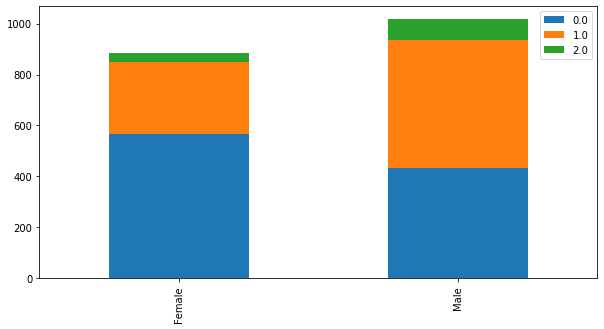

In [35]:
bar_chart_1('age')

### Height and weight

In [36]:
#fill missing age, height and weight for each gender
data['height'].fillna(data.groupby('gender')['height'].transform("median"), inplace=True)    
data['weight'].fillna(data.groupby('gender')['weight'].transform("median"), inplace=True)

In [37]:
data.loc[data['height']<=165,'height'] = 0,
data.loc[(data['height']>165)&(data['height']<=177),'height'] = 1,
data.loc[data['height']>177,'height'] = 2

In [38]:
test.loc[test['height']<=165,'height'] = 0,
test.loc[(test['height']>165)&(test['height']<=177),'height'] = 1,
test.loc[test['height']>177,'height'] = 2

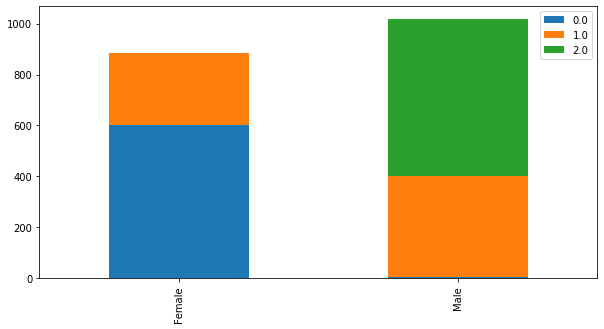

In [39]:
bar_chart_1('height')

In [40]:
data.loc[data['weight']<=55,'weight'] = 0,
data.loc[(data['weight']>55)&(data['weight']<=65),'weight'] = 1,
data.loc[data['weight']>65,'weight'] = 2

In [41]:
test.loc[test['weight']<=55,'weight'] = 0,
test.loc[(test['weight']>55)&(test['weight']<=65),'weight'] = 1,
test.loc[test['weight']>65,'weight'] = 2

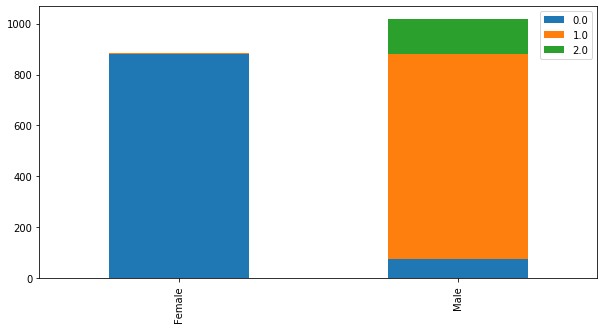

In [42]:
bar_chart_1('weight')

In [43]:
data.head(10)

,rank,name,agency,group,age,height,weight,blood type,country,position,gender,popularity
0,1,Jinah,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,0.0,0.0,NaN,South Korea,"Leader, Vocalist",1,0
1,2,Hayul,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,0.0,0.0,NaN,South Korea,Vocalist,1,0
2,3,Jieun,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,0.0,0.0,NaN,South Korea,Vocalist,1,0
3,4,Yunmi,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,0.0,0.0,NaN,South Korea,Vocalist,1,0
4,5,Haum,주식회사 씨그널엔터테인먼트그룹,Berry Chu,1.0,0.0,0.0,NaN,South Korea,"Vocalist, Maknae",1,0
5,6,Soyou,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,0.0,0.0,NaN,South Korea,Vocalist,1,0
6,7,Vanya,Zenith Media Contents,Z-Girls,0.0,0.0,0.0,O,Indonesia,"Lead Vocalist, Main Dancer, Lead Rapper",1,0
7,8,Roy,Zenith Media Contents,Z-Boys,0.0,2.0,1.0,NaN,Vietnam,Main Vocalist,0,0
8,9,Josh,Zenith Media Contents,Z-Boys,0.0,1.0,1.0,NaN,Philippines,"Main Dancer, Lead Vocalist",0,0
9,10,Sid,Zenith Media Contents,Z-Boys,0.0,2.0,1.0,NaN,India,Main Vocalist,0,0


### Blood type

In [44]:
#change values of Blood type column and fill NaN values for each gender
bloodtype_map = {"O": 1, "A": 2, "B": 3, "AB": 4}
data['blood type']= data['blood type'].map(bloodtype_map)
data['blood type'].fillna(data.groupby('gender')['blood type'].transform("median"), inplace=True)    

In [45]:
#change values of Blood type column 
bloodtype_map = {"O": 1, "A": 2, "B": 3, "AB": 4}
test['blood type']= test['blood type'].map(bloodtype_map)

In [46]:
data.head(10)

,rank,name,agency,group,age,height,weight,blood type,country,position,gender,popularity
0,1,Jinah,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,0.0,0.0,2.0,South Korea,"Leader, Vocalist",1,0
1,2,Hayul,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,0.0,0.0,2.0,South Korea,Vocalist,1,0
2,3,Jieun,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,0.0,0.0,2.0,South Korea,Vocalist,1,0
3,4,Yunmi,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,0.0,0.0,2.0,South Korea,Vocalist,1,0
4,5,Haum,주식회사 씨그널엔터테인먼트그룹,Berry Chu,1.0,0.0,0.0,2.0,South Korea,"Vocalist, Maknae",1,0
5,6,Soyou,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,0.0,0.0,2.0,South Korea,Vocalist,1,0
6,7,Vanya,Zenith Media Contents,Z-Girls,0.0,0.0,0.0,1.0,Indonesia,"Lead Vocalist, Main Dancer, Lead Rapper",1,0
7,8,Roy,Zenith Media Contents,Z-Boys,0.0,2.0,1.0,2.0,Vietnam,Main Vocalist,0,0
8,9,Josh,Zenith Media Contents,Z-Boys,0.0,1.0,1.0,2.0,Philippines,"Main Dancer, Lead Vocalist",0,0
9,10,Sid,Zenith Media Contents,Z-Boys,0.0,2.0,1.0,2.0,India,Main Vocalist,0,0


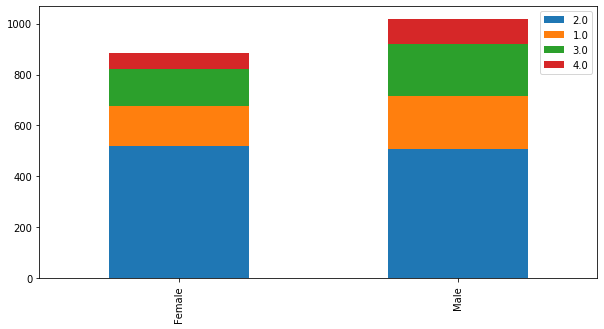

In [47]:
bar_chart_1('blood type')

### Position

In [48]:
#fill missing values of position 
data['position'] = data['position'].fillna("0")

#identify three main positions
for i, j in data.iterrows():
    d = data['position'][i]
    if "Rapper" in d:
        data.at[i, 'position'] = "Rapper" 
    elif "Vocalist" in d:
        data.at[i, 'position'] = "Vocalist" 
    else:
        data.at[i, 'position'] = "Other"

In [49]:
#fill missing values of position 
test['position'] = test['position'].fillna("0")

#identify three main positions
for i, j in test.iterrows():
    d = test['position'][i]
    if "Vocalist" in d:
        test.at[i, 'position'] = "Vocalist" 
    elif "Rapper" in d:
        test.at[i, 'position'] = "Rapper" 
    else:
        test.at[i, 'position'] = "Other"

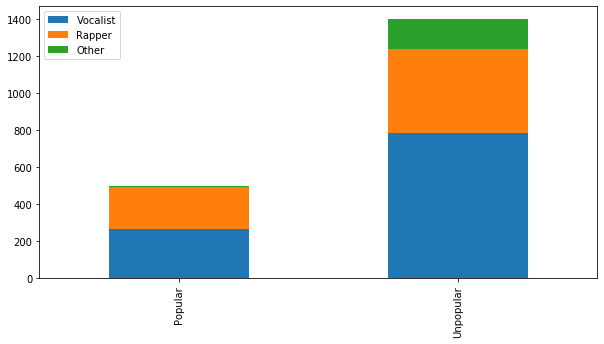

In [50]:
bar_chart('position')

Vocalists are the most popular

In [51]:
#change values of position column
position_map = {"Vocalist": 1, "Rapper": 2, "Other": 3}
data['position']= data['position'].map(position_map)

In [52]:
#change values of position column
position_map = {"Vocalist": 1, "Rapper": 2, "Other": 3}
test['position']= test['position'].map(position_map)

In [53]:
data.head(10)

,rank,name,agency,group,age,height,weight,blood type,country,position,gender,popularity
0,1,Jinah,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,0.0,0.0,2.0,South Korea,1,1,0
1,2,Hayul,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,0.0,0.0,2.0,South Korea,1,1,0
2,3,Jieun,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,0.0,0.0,2.0,South Korea,1,1,0
3,4,Yunmi,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,0.0,0.0,2.0,South Korea,1,1,0
4,5,Haum,주식회사 씨그널엔터테인먼트그룹,Berry Chu,1.0,0.0,0.0,2.0,South Korea,1,1,0
5,6,Soyou,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,0.0,0.0,2.0,South Korea,1,1,0
6,7,Vanya,Zenith Media Contents,Z-Girls,0.0,0.0,0.0,1.0,Indonesia,2,1,0
7,8,Roy,Zenith Media Contents,Z-Boys,0.0,2.0,1.0,2.0,Vietnam,1,0,0
8,9,Josh,Zenith Media Contents,Z-Boys,0.0,1.0,1.0,2.0,Philippines,1,0,0
9,10,Sid,Zenith Media Contents,Z-Boys,0.0,2.0,1.0,2.0,India,1,0,0


### Country

In [54]:
#fill missing values of countries 
data["country"].fillna(method ='ffill', inplace = True) 

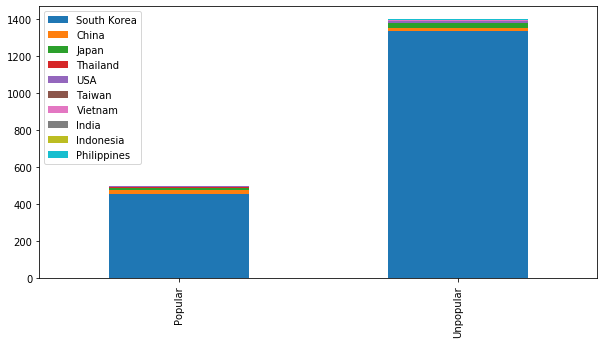

In [55]:
bar_chart('country')

Most popular idols from South Korea

In [56]:
country_map = {"South Korea": 1, "China": 0, "Japan": 0, "Taiwan": 0, "India": 0,  "USA": 0, "Thailand": 0, "Vietnam": 0, "Indonesia": 0, "Philippines": 0}
data['country'] = data['country'].map(country_map)
test['country'] = test['country'].map(country_map)

In [57]:
#drop colums
to_drop = ['agency', 'name', 'group', 'rank']
data = data.drop(to_drop, axis=1)

In [58]:
to_drop = ['agency', 'group', 'rank', 'real name', 'origin', 'industry']
test = test.drop(to_drop, axis=1)

In [59]:
test.head(10)

,name,age,height,weight,blood type,country,position,gender
0,Peak,0,2,2,2,0,3,0
1,Son Dong Pyo,0,1,0,1,1,1,0
2,Lee Jun Hyuk,0,2,1,3,1,1,0
3,Lee Hwan,0,1,0,2,1,1,0
4,Yoon Seo Hyeung,0,0,0,3,1,3,1
5,Uehera Jun,0,1,1,3,0,3,0
6,Park Ga Eul,0,0,0,3,1,3,1
7,Yim Kyung Ha,0,0,0,4,1,1,1
8,Lee Eugene,0,1,1,2,1,3,0
9,Lim Hoy Sun,0,1,0,1,1,2,1


# 3. Feature Engineering

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [61]:
X_train = data.drop("popularity", axis=1)
Y_train = data["popularity"]
X_test  = test.drop("name", axis=1).copy()

### Random Forest

In [62]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)
prediction = rf.predict(X_test)
rf.score(X_train, Y_train)
accuracy_rf = round(rf.score(X_train, Y_train) * 100, 2)

### Logistic regression

In [63]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, Y_train)
prediction = logreg.predict(X_test)
accuracy_lr = round(logreg.score(X_train, Y_train) * 100, 2)

### Decision tree

In [64]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
prediction = dtree.predict(X_test)
accuracy_dt = round(dtree.score(X_train, Y_train) * 100, 2)

### Model evaluation

In [65]:
res = pd.DataFrame({
    'Model': ['Random Forest',
             'Logistic Regression',
             'Decision Tree'],
    'Score': [accuracy_rf,
             accuracy_lr,
             accuracy_dt]})

score = res.sort_values(by='Score', ascending=False)
score = score.set_index('Score')
score.head()

,Model
Score,
77.01,Random Forest
77.01,Decision Tree
73.28,Logistic Regression


### Feature importance

In [66]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(8)

,importance
feature,
blood type,0.243
position,0.227
age,0.175
height,0.119
weight,0.117
country,0.085
gender,0.034


### Testing

In [67]:
test_data = test.drop('name', axis=1).copy()

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)
prediction = rf.predict(X_test)

submission = pd.DataFrame({
        "name": test["name"],
        "popularity": prediction
    })

submission.to_csv('submission.csv', index=False)
submission = pd.read_csv('submission.csv')
submission.head(66)

,name,popularity
0,Peak,0
1,Son Dong Pyo,0
2,Lee Jun Hyuk,1
3,Lee Hwan,0
4,Yoon Seo Hyeung,0
5,Uehera Jun,0
6,Park Ga Eul,0
7,Yim Kyung Ha,0
8,Lee Eugene,0
9,Lim Hoy Sun,0


### Cross validation

In [68]:
rf = RandomForestClassifier(n_estimators=100)
score = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Score:", score)
print("Mean:", score.mean())
print("Standard Deviation:", score.std())

Score: [0.63874346 0.70526316 0.74736842 0.74210526 0.68947368 0.73157895
 0.69473684 0.74210526 0.74210526 0.72105263]
Mean: 0.7154532929181594
Standard Deviation: 0.03245504073870337
